In [2]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas
import seaborn as sns 
from sklearn import preprocessing
import nltk 
from nltk.stem.isri import ISRIStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
import arabic_reshaper
from bidi.algorithm import get_display
import os
import codecs
from collections import Counter 
import re
import string
import matplotlib.cm as cm
from matplotlib import rcParams
from prettytable import PrettyTable
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pickle
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from joblib import load, dump 
import h5py
from tensorflow.keras.models import load_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
f_df=pd.read_json('data/data.json')
f_df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


In [4]:
f_df.describe().T

,count,mean,std,min,25%,50%,75%,max
approx_payout_date,14337.0,1.350933e+09,2.401300e+07,1.171256e+09,1.334221e+09,1.355805e+09,1.370646e+09,1.523488e+09
body_length,14337.0,3.672522e+03,5.758113e+03,0.000000e+00,7.500000e+02,1.990000e+03,4.280000e+03,6.553500e+04
channels,14337.0,6.176676e+00,3.860333e+00,0.000000e+00,5.000000e+00,6.000000e+00,8.000000e+00,1.300000e+01
delivery_method,14321.0,4.395643e-01,5.914866e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00
event_created,14337.0,1.345825e+09,2.404107e+07,1.170332e+09,1.329754e+09,1.351043e+09,1.365346e+09,1.382012e+09
event_end,14337.0,1.350501e+09,2.401299e+07,1.170824e+09,1.333789e+09,1.355373e+09,1.370214e+09,1.523056e+09
event_published,14238.0,1.340854e+09,8.750386e+07,0.000000e+00,1.329499e+09,1.351099e+09,1.365478e+09,1.381608e+09
event_start,14337.0,1.350205e+09,2.398787e+07,1.170819e+09,1.333406e+09,1.355000e+09,1.370048e+09,1.418850e+09
fb_published,14337.0,1.274325e-01,3.334685e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
gts,14337.0,2.430231e+03,9.142308e+03,0.000000e+00,1.164100e+02,4.319300e+02,1.547260e+03,3.062939e+05


In [5]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acct_type           14337 non-null  object 
 1   approx_payout_date  14337 non-null  int64  
 2   body_length         14337 non-null  int64  
 3   channels            14337 non-null  int64  
 4   country             14256 non-null  object 
 5   currency            14337 non-null  object 
 6   delivery_method     14321 non-null  float64
 7   description         14337 non-null  object 
 8   email_domain        14337 non-null  object 
 9   event_created       14337 non-null  int64  
 10  event_end           14337 non-null  int64  
 11  event_published     14238 non-null  float64
 12  event_start         14337 non-null  int64  
 13  fb_published        14337 non-null  int64  
 14  gts                 14337 non-null  float64
 15  has_analytics       14337 non-null  int64  
 16  has_

In [6]:
f_df.isnull().sum()

acct_type                0
approx_payout_date       0
body_length              0
channels                 0
country                 81
currency                 0
delivery_method         16
description              0
email_domain             0
event_created            0
event_end                0
event_published         99
event_start              0
fb_published             0
gts                      0
has_analytics            0
has_header            5409
has_logo                 0
listed                   0
name                     0
name_length              0
num_order                0
num_payouts              0
object_id                0
org_desc                 0
org_facebook            59
org_name                 0
org_twitter             59
payee_name               0
payout_type              0
previous_payouts         0
sale_duration          155
sale_duration2           0
show_map                 0
ticket_types             0
user_age                 0
user_created             0
u

In [7]:
f_df['acct_type'].value_counts()

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

# Adding Fraud column

In [8]:
f_df['Fraud']=f_df['acct_type'].str.find('fraud')

In [9]:
f_df['Fraud'][f_df['Fraud']!= -1] = 1 
f_df['Fraud'][f_df['Fraud']== -1] = 0


f_df.shape

(14337, 45)

In [10]:
f_df['Fraud'].value_counts()

0    13044
1     1293
Name: Fraud, dtype: int64

In [11]:
f_df.head(50)

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,Fraud
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,1
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,0
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,0
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,889,1283870102,3,,None,NaN,NaN,None,None,0
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,0
5,premium,1300496400,117,6,US,USD,0.0,<p>Come join the Bluegrass Stallions as they t...,bluegrassstallions.com,1294421810,...,299,1268579110,1,,US,38.209797,-84.558831,Georgetown College Alumni Gymnasium,KY,0
6,premium,1297909800,28,5,US,USD,1.0,<p> </p>\r\n<p> </p>\r\n<p> </p>,naboe.org,1294425018,...,706,1233437951,3,6N East St,US,39.414270,-77.405089,Danielle's Restaurant,MD,0
7,premium,1296709200,974,12,US,USD,0.0,<p><em>WHEN JEKYLL MET HYDE</em></p>\r\n<p>The...,themagnetictheatre.org,1294427837,...,71,1288276103,3,372 Depot Street,US,35.580468,-82.563855,The Magnetic Field,NC,0
8,premium,1298185200,4388,4,US,USD,0.0,"<p style=""text-align: center;""><font face=""boo...",credosf.com,1294428122,...,0,1294428121,3,465 California Street,US,37.792847,-122.402082,,,0
9,premium,1297314000,974,12,US,USD,0.0,<p><em>WHEN JEKYLL MET HYDE</em></p>\r\n<p>The...,themagnetictheatre.org,1294428286,...,71,1288276103,3,372 Depot Street,US,35.580468,-82.563855,The Magnetic Field,NC,0


# EDA

In [12]:
f_df.drop(columns=['has_header', 'org_facebook', 'org_twitter', 'event_published', 'sale_duration', 'venue_country', 
                  'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state'], inplace=True) 

In [13]:
f_df.isnull().sum()

acct_type              0
approx_payout_date     0
body_length            0
channels               0
country               81
currency               0
delivery_method       16
description            0
email_domain           0
event_created          0
event_end              0
event_start            0
fb_published           0
gts                    0
has_analytics          0
has_logo               0
listed                 0
name                   0
name_length            0
num_order              0
num_payouts            0
object_id              0
org_desc               0
org_name               0
payee_name             0
payout_type            0
previous_payouts       0
sale_duration2         0
show_map               0
ticket_types           0
user_age               0
user_created           0
user_type              0
venue_address          0
Fraud                  0
dtype: int64

In [14]:
f_df.dropna(inplace=True)

In [15]:
f_df.isnull().sum()

acct_type             0
approx_payout_date    0
body_length           0
channels              0
country               0
currency              0
delivery_method       0
description           0
email_domain          0
event_created         0
event_end             0
event_start           0
fb_published          0
gts                   0
has_analytics         0
has_logo              0
listed                0
name                  0
name_length           0
num_order             0
num_payouts           0
object_id             0
org_desc              0
org_name              0
payee_name            0
payout_type           0
previous_payouts      0
sale_duration2        0
show_map              0
ticket_types          0
user_age              0
user_created          0
user_type             0
venue_address         0
Fraud                 0
dtype: int64

In [16]:
f_df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,payout_type,previous_payouts,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,Fraud
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,,[],33,1,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,1
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,CHECK,"[{'name': 'RUF', 'created': '2010-10-01 01:10:...",28,0,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,0
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,CHECK,"[{'name': 'Danielle Severn', 'created': '2010-...",54,0,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,0
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,ACH,"[{'name': '', 'created': '2010-11-09 01:10:15'...",0,0,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,0
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,CHECK,[{'name': 'Arts and Business Council or Greate...,63,0,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,0


In [17]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14240 entries, 0 to 14336
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acct_type           14240 non-null  object 
 1   approx_payout_date  14240 non-null  int64  
 2   body_length         14240 non-null  int64  
 3   channels            14240 non-null  int64  
 4   country             14240 non-null  object 
 5   currency            14240 non-null  object 
 6   delivery_method     14240 non-null  float64
 7   description         14240 non-null  object 
 8   email_domain        14240 non-null  object 
 9   event_created       14240 non-null  int64  
 10  event_end           14240 non-null  int64  
 11  event_start         14240 non-null  int64  
 12  fb_published        14240 non-null  int64  
 13  gts                 14240 non-null  float64
 14  has_analytics       14240 non-null  int64  
 15  has_logo            14240 non-null  int64  
 16  list

In [18]:
f_df.columns

Index(['acct_type', 'approx_payout_date', 'body_length', 'channels', 'country',
       'currency', 'delivery_method', 'description', 'email_domain',
       'event_created', 'event_end', 'event_start', 'fb_published', 'gts',
       'has_analytics', 'has_logo', 'listed', 'name', 'name_length',
       'num_order', 'num_payouts', 'object_id', 'org_desc', 'org_name',
       'payee_name', 'payout_type', 'previous_payouts', 'sale_duration2',
       'show_map', 'ticket_types', 'user_age', 'user_created', 'user_type',
       'venue_address', 'Fraud'],
      dtype='object')

In [29]:
f_df.drop(columns=['acct_type', 'approx_payout_date', 'body_length',
       'currency', 'description', 'email_domain',
       'event_created', 'event_end', 'event_start', 'fb_published', 'gts',
       'has_analytics', 'has_logo', 'listed', 'name', 'name_length','object_id', 'org_desc', 'org_name',
       'payee_name', 'previous_payouts', 'sale_duration2',
       'ticket_types', 'user_created',
       'venue_address', 'num_payouts'], inplace=True)

f_df.head(50)

,channels,country,delivery_method,num_order,payout_type,show_map,user_age,user_type,Fraud
0,5,US,0.0,0,,1,36,1,1
1,0,US,1.0,23,CHECK,0,149,3,0
2,8,US,1.0,19,CHECK,0,214,3,0
3,6,IE,1.0,39,ACH,0,889,3,0
4,11,US,0.0,30,CHECK,0,35,3,0
5,6,US,0.0,14,CHECK,1,299,1,0
6,5,US,1.0,12,ACH,1,706,3,0
7,12,US,0.0,6,ACH,1,71,3,0
8,4,US,0.0,12,ACH,0,0,3,0
9,12,US,0.0,14,ACH,1,71,3,0


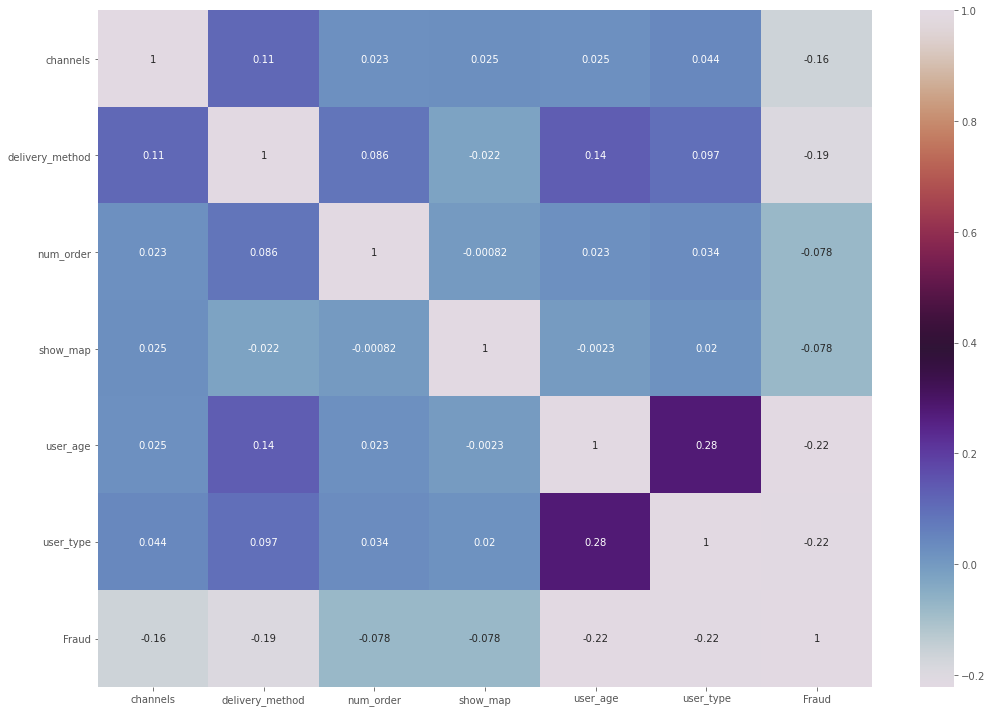

<Figure size 432x288 with 0 Axes>

In [30]:
plt.figure(figsize = (15,10))
sns.heatmap(f_df.corr(),annot = True, cmap='twilight')
fig1 = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
fig1.savefig('image/heatmap.jpg', dpi=100);

In [31]:
data=pd.get_dummies(f_df,columns=["country", "payout_type"])
data.head()

,channels,delivery_method,num_order,show_map,user_age,user_type,Fraud,country_,country_A1,country_AE,...,country_TR,country_US,country_UY,country_VE,country_VI,country_VN,country_ZA,payout_type_,payout_type_ACH,payout_type_CHECK
0,5,0.0,0,1,36,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,1.0,23,0,149,3,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,8,1.0,19,0,214,3,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,6,1.0,39,0,889,3,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,11,0.0,30,0,35,3,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [32]:
data.columns

Index(['channels', 'delivery_method', 'num_order', 'show_map', 'user_age',
       'user_type', 'Fraud', 'country_', 'country_A1', 'country_AE',
       'country_AR', 'country_AT', 'country_AU', 'country_BB', 'country_BE',
       'country_BG', 'country_BS', 'country_CA', 'country_CH', 'country_CI',
       'country_CM', 'country_CN', 'country_CO', 'country_CR', 'country_CZ',
       'country_DE', 'country_DK', 'country_DZ', 'country_EC', 'country_ES',
       'country_FI', 'country_FR', 'country_GB', 'country_GH', 'country_GR',
       'country_HR', 'country_HU', 'country_ID', 'country_IE', 'country_IL',
       'country_IM', 'country_IN', 'country_IS', 'country_IT', 'country_JE',
       'country_JM', 'country_KE', 'country_KH', 'country_LB', 'country_MA',
       'country_MX', 'country_MY', 'country_NA', 'country_NG', 'country_NI',
       'country_NL', 'country_NZ', 'country_PH', 'country_PK', 'country_PR',
       'country_PS', 'country_PT', 'country_QA', 'country_RO', 'country_RS',
       'c

In [33]:
county_codes=['country_', 'country_A1', 'country_AE',
       'country_AR', 'country_AT', 'country_AU', 'country_BB', 'country_BE',
       'country_BG', 'country_BS', 'country_CA', 'country_CH', 'country_CI',
       'country_CM', 'country_CN', 'country_CO', 'country_CR', 'country_CZ',
       'country_DE', 'country_DK', 'country_DZ', 'country_EC', 'country_ES',
       'country_FI', 'country_FR', 'country_GB', 'country_GH', 'country_GR',
       'country_HR', 'country_HU', 'country_ID', 'country_IE', 'country_IL',
       'country_IM', 'country_IN', 'country_IS', 'country_IT', 'country_JE',
       'country_JM', 'country_KE', 'country_KH', 'country_LB', 'country_MA',
       'country_MX', 'country_MY', 'country_NA', 'country_NG', 'country_NI',
       'country_NL', 'country_NZ', 'country_PH', 'country_PK', 'country_PR',
       'country_PS', 'country_PT', 'country_QA', 'country_RO', 'country_RS',
       'country_RU', 'country_SE', 'country_SG', 'country_SI', 'country_TH',
       'country_TJ', 'country_TR', 'country_US', 'country_UY', 'country_VE',
       'country_VI', 'country_VN', 'country_ZA']

In [34]:
payout_codes=['payout_type_',
       'payout_type_ACH', 'payout_type_CHECK']

In [35]:
X=data.drop(columns='Fraud')
y=data['Fraud']
X.shape, y.shape

((14240, 80), (14240,))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=123)
scores=[]

In [37]:
X_train.head()

,channels,delivery_method,num_order,show_map,user_age,user_type,country_,country_A1,country_AE,country_AR,...,country_TR,country_US,country_UY,country_VE,country_VI,country_VN,country_ZA,payout_type_,payout_type_ACH,payout_type_CHECK
6089,8,1.0,10,1,875,4,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
13280,5,0.0,2,1,415,3,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
7369,8,1.0,3,1,1210,4,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5785,8,0.0,3,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7903,0,0.0,8,1,735,3,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [38]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components = .90, random_state=0)),
                 ('Lr', LogisticRegression())])

pipe.fit(X_train, y_train)
y_pred=pipe.predict(X_test)
lr_acc=pipe.score(X_test, y_test)
lr_p=round(precision_score(y_test, y_pred),2)
lr_r=round(recall_score(y_test, y_pred),2)
lr_f=round(f1_score(y_test, y_pred),2)
print('Accuracy= {:.3f}'.format(pipe.score(X_test, y_test)))
print('Precision= {:.3f}'.format(round(precision_score(y_test, y_pred),2)))
print('Recall= {:.3f}'.format(round(recall_score(y_test, y_pred),2)))
print('F1= {:.3f}'.format(round(f1_score(y_test, y_pred),2)))
scores.append(round(lr_acc, 3))

Accuracy= 0.953
Precision= 0.870
Recall= 0.500
F1= 0.640


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components = .90, random_state=0)),
                 ('Ridge', RidgeClassifier())])

pipe.fit(X_train, y_train)
y_pred=pipe.predict(X_test)
R_acc=pipe.score(X_test, y_test)
R_p=round(precision_score(y_test, y_pred),2)
R_r=round(recall_score(y_test, y_pred),2)
R_f=round(f1_score(y_test, y_pred),2)
print('Accuracy= {:.3f}'.format(pipe.score(X_test, y_test)))
print('Precision= {:.3f}'.format(round(precision_score(y_test, y_pred),2)))
print('Recall= {:.3f}'.format(round(recall_score(y_test, y_pred),2)))
print('F1= {:.3f}'.format(round(f1_score(y_test, y_pred),2)))
scores.append(round(R_acc, 3))

Accuracy= 0.950
Precision= 0.930
Recall= 0.420
F1= 0.580


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components = .90, random_state=0)),
                 ('RF', RandomForestClassifier())])

pipe.fit(X_train, y_train)
y_pred=pipe.predict(X_test)
RF_acc=pipe.score(X_test, y_test)
RF_p=round(precision_score(y_test, y_pred),2)
RF_r=round(recall_score(y_test, y_pred),2)
RF_f=round(f1_score(y_test, y_pred),2) 
print('Accuracy= {:.3f}'.format(pipe.score(X_test, y_test)))
print('Precision= {:.3f}'.format(round(precision_score(y_test, y_pred),2)))
print('Recall= {:.3f}'.format(round(recall_score(y_test, y_pred),2)))
print('F1= {:.3f}'.format(round(f1_score(y_test, y_pred),2)))
scores.append(round(RF_acc, 3))

Accuracy= 0.953
Precision= 0.750
Recall= 0.640
F1= 0.690


In [41]:
val_predicts = pipe.predict(X_test)
# y_pred = [1 * (x[0]>=0.5) for x in val_predicts]
cm = confusion_matrix(y_test, y_pred)
# print(val_predicts)
# print(y_pred)
print(cm)

[[3207   61]
 [ 105  187]]


In [42]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(3207, 61, 105, 187)

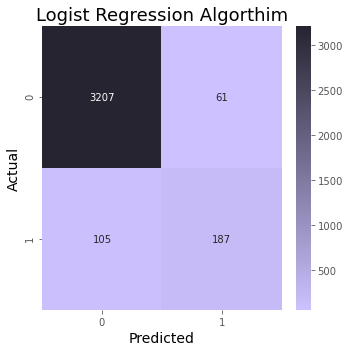

<Figure size 432x288 with 0 Axes>

In [43]:
fig, ax = plt.subplots(1, figsize = (5,5))
hm=sns.dark_palette("#CDC1FF",reverse=True, as_cmap=True)
sns.heatmap([[tn, fp], [fn, tp]], annot=True,fmt="d", cmap=hm)
ax.set_title('Logist Regression Algorthim', fontsize=18)
ax.set_xlabel('Predicted', fontsize=14, color='black')
ax.set_ylabel('Actual', fontsize=14, color='black')
fig1 = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
fig1.savefig('image/RF_cm.jpg', dpi=100);

In [44]:
from joblib import load, dump
model=dump(pipe, 'RF_model.joblib')

In [45]:
Accuracy= 0.971
Precision= 0.880
Recall= 0.750
F1= 0.810

In [46]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms")
x.field_names = ["Model","Accuracy score", "Percision score", 'Recall scoure', "F1 score"]

x.add_row(["Logistic Regression Algorithm", round(lr_acc,3), lr_p, lr_r, lr_f ])
x.add_row(["Ridge Algorithm", round(R_acc, 3), R_p, R_r, R_f])
x.add_row(["Random Forest Algorithm Algorithm", round(RF_acc, 3), RF_p, RF_r, RF_f])

print(x)
print('\n')



Comparison of all algorithms
+-----------------------------------+----------------+-----------------+---------------+----------+
|               Model               | Accuracy score | Percision score | Recall scoure | F1 score |
+-----------------------------------+----------------+-----------------+---------------+----------+
|   Logistic Regression Algorithm   |     0.953      |       0.87      |      0.5      |   0.64   |
|          Ridge Algorithm          |      0.95      |       0.93      |      0.42     |   0.58   |
| Random Forest Algorithm Algorithm |     0.953      |       0.75      |      0.64     |   0.69   |
+-----------------------------------+----------------+-----------------+---------------+----------+


